# Perceptron Algorithm for Classification in 4 Lines of Python Code

In this example we are going to see how to classify a binary problem with a perceptron in a few lines of code in Python.

## Preliminaries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from collections import defaultdict

from sklearn.datasets import make_blobs
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

## Synthetic Data

In [2]:
X, y = make_blobs(
    n_samples=150,
    n_features=2,
    centers=2,
    cluster_std=1.55,
    random_state=2022
)

X[:4]  # First four samples

array([[ -9.41416331, -10.97616269],
       [ -5.75275524,  -9.15768251],
       [ -9.99068443,   0.94582866],
       [ -8.77136732,  -9.45117159]])

Add the ones column for bias.

In [3]:
bias = np.ones([X.shape[0], 1]).reshape(-1, 1)
X = np.append(bias, X, axis=1)

X[:4]

array([[  1.        ,  -9.41416331, -10.97616269],
       [  1.        ,  -5.75275524,  -9.15768251],
       [  1.        ,  -9.99068443,   0.94582866],
       [  1.        ,  -8.77136732,  -9.45117159]])

In [4]:
y[:4]  # First four labels for target

array([1, 1, 0, 1])

In [5]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=2022)

In [6]:
X_train[:, 1].shape, X_train[:, 2].shape

((105,), (105,))

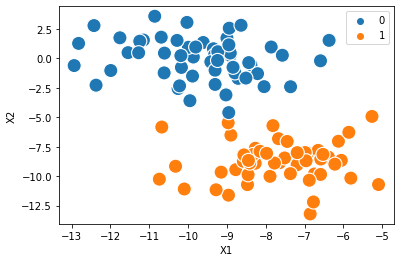

In [7]:
# Let's see the X features
sns.scatterplot(x=X_train[:, 1], y=X_train[:, 2], hue=y_train, s=200)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()  # Two samples are very close

## Perceptron

Perceptron is a very simple algorithm that emulates the functioning of a neuron, in the following figure **in**puts are $X_n$, wheights $W_n$, and **bias** (allow up/down the generate line) is $W_0$

<div>
    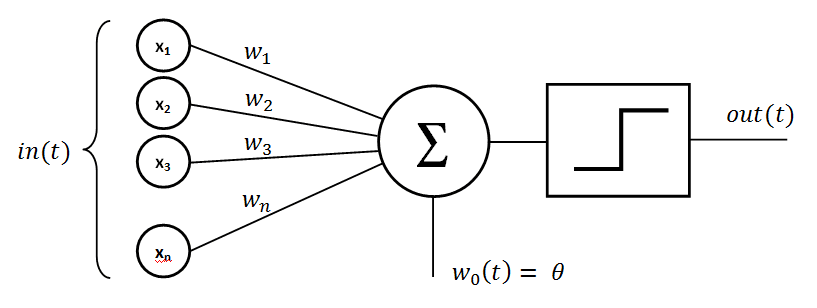
</div>

We can define this model as follows:

* Calculate dot product for $X_n \cdot W_n$, this result will be called $linear\_output$.

<font color='red'>$$linear\_output = X \cdot W$$</font>

* Our neuronal activation will depend of an activation function. For example, if this activation function exceeds a threshold, we will get 1, otherwise 0.

<font color='red'>$$\hat{y} = activation(linear\_output)$$</font>

* We will get an $error$ as the difference between our real target $y$ and the predicted target $\hat{y}$.

$$error = y - \hat{y}$$

* To make a $correction$ for this $error$, we can multiply this by a learning rate $\alpha$ (yes, our perceptron will be a bit smart).

$$correction = \alpha * error$$

* To save this $correction$, just update weights doing a dot product of $correction$ and $inputs$ and add it to $W$.

$$W = W + correction \cdot X$$

* Mmmm, we can shorten it: 

<font color='red'>$$W = W + \alpha * (y - \hat{y}) \cdot X$$</font>

We are missing something, how many times will it be repeated? Well, this problem will be labeled $epochs$.

Lets code it!

In [8]:
# Some settings
alpha = 0.001  # learning rate
W = np.random.random(X_train.shape[1])  # maybe some lucky weights
threshold = 0  
activation = lambda z: np.where(z > threshold, 1, 0)  # for this case we will use 'step' function
epochs = 10  # few repetitions

<font color='red'>4 lines of Python for the perceptron algorithm</font>

In [9]:
for _ in range(epochs):
    linear_output = X_train @ W 
    y_pred = activation(linear_output)
    W += alpha * (y_train - y_pred) @ X_train

In [10]:
# Make a prediction
y_pred = activation(X_test @ W)
y_pred[:4]  # seems to work

array([1, 0, 0, 1])

In [11]:
# How good is our perceptron?
clf_report = classification_report(y_test, y_pred)
print(clf_report)  # Awesome!!!

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        25

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

